## Step 1: Problem Statement

To build a machine learning model that can predict whether a patient has heart disease or not based on medical attributes such as age, sex, chest pain type, blood pressure, cholesterol levels, etc.

 ## Step 2: Importing Required Libraries

In [1]:
import joblib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display_html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

 ## Step 3: Importing Dataset

In [2]:
df = pd.read_csv('dataset.csv')

## Step 4: Data Understanding

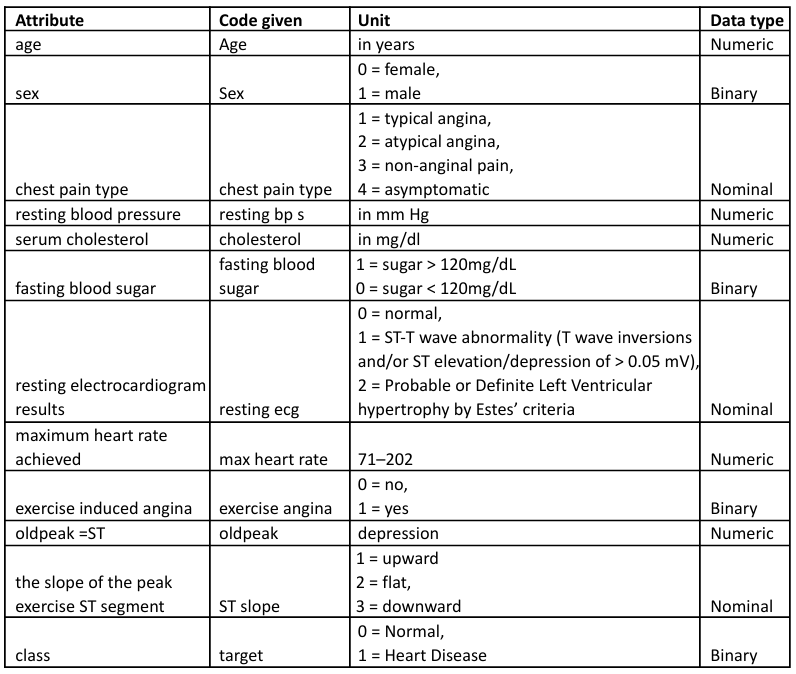

In [3]:
# Show first 5 rows
print("First 5 Rows:")
df.head()


First 5 Rows:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Dataset dimensions
print("Shape of Dataset (rows, columns):", df.shape)


Shape of Dataset (rows, columns): (1190, 12)


In [5]:
# Info about each column (data types + null values)
print("Column Information:")
df.info()


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
# Summary stats of numeric columns
print("Statistical Summary:")
df.describe()


Statistical Summary:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
# Check for missing values
print(" Missing Values in Each Column:")
print(df.isnull().sum())


 Missing Values in Each Column:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


No Missing Valus Found.

In [8]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

 0=Normal,
 1=HeartDisease

 ## Step 5: Exploratory Data Analysis (EDA)

EDA helps you:

* Understand relationships between features

* Identify patterns and trends

* Choose the best features for modeling

### 🔹 5.1 Correlation Matrix

We'll use a heatmap to see how features are correlated with each other and with the target (class) column.

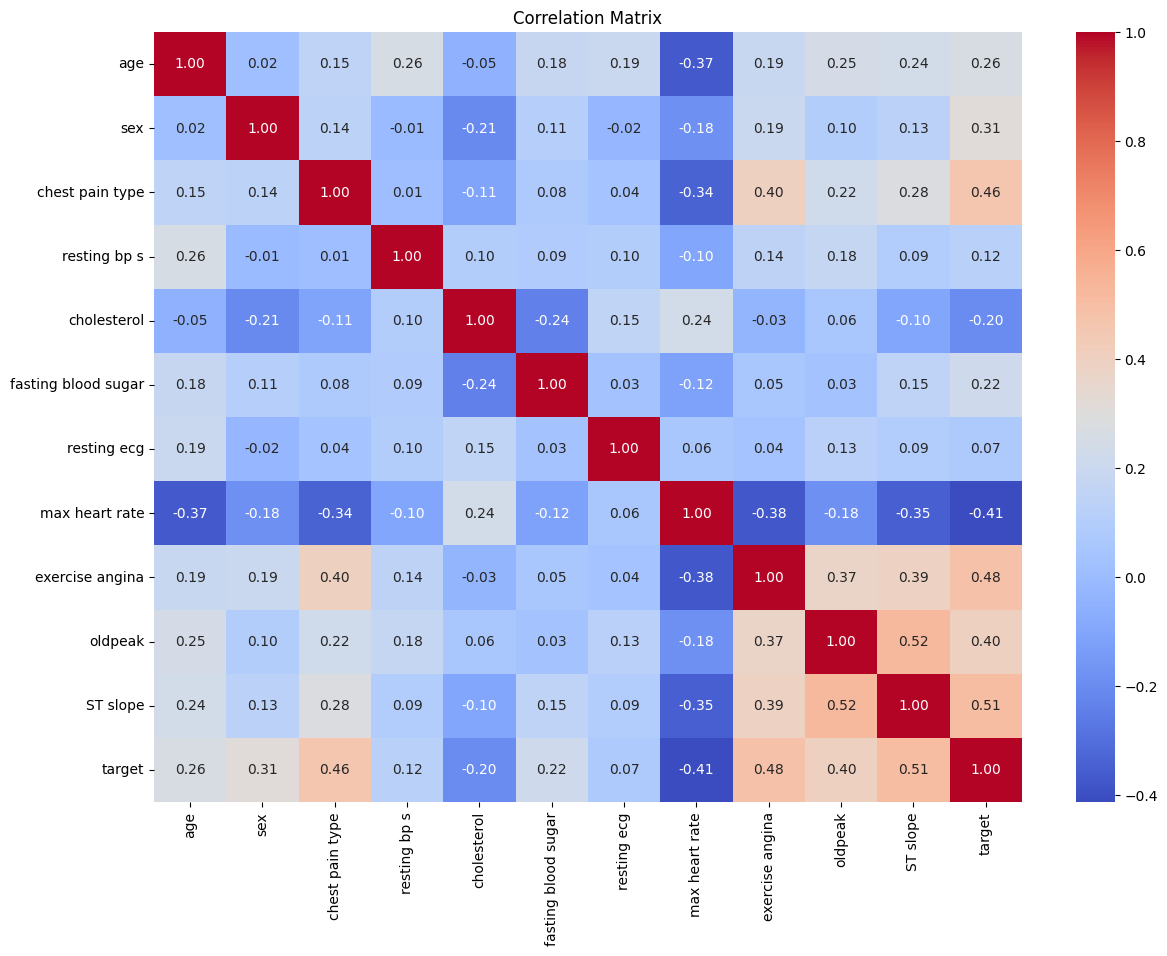

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 🔹 5.2 Boxplots: How Features Vary with Heart Disease

We’ll check if age, cholesterol, and maximum heart rate vary between patients with and without heart disease.

In [10]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

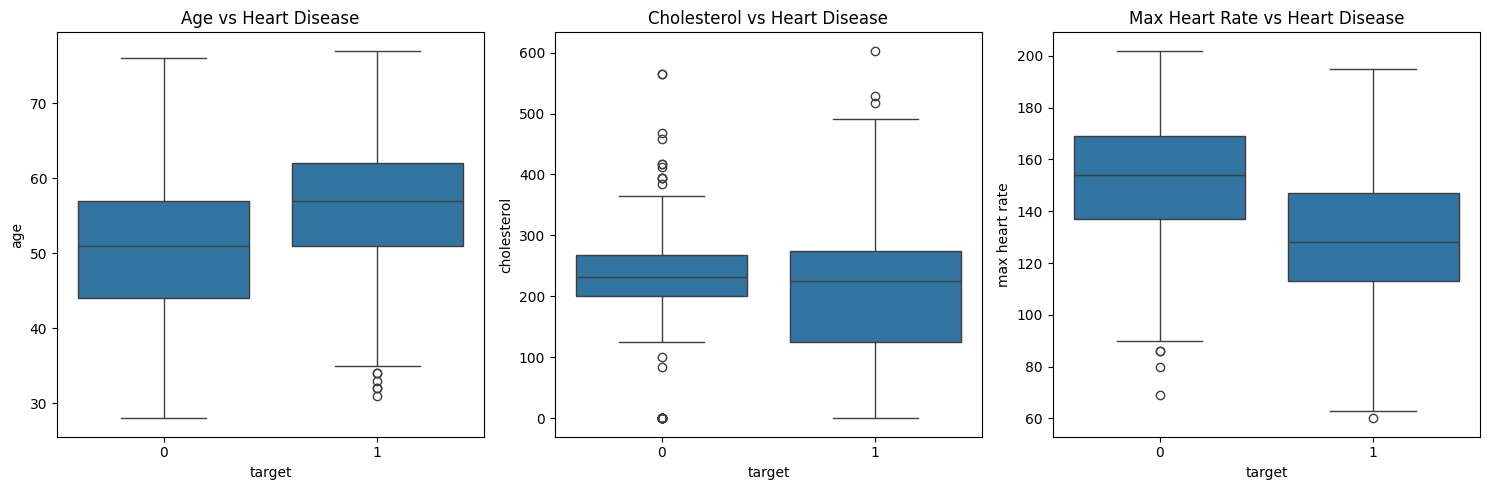

In [11]:
plt.figure(figsize=(15, 5))

# Plot 1: Age vs Heart Disease
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")

# Plot 2: Cholesterol vs Heart Disease
plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='cholesterol', data=df)
plt.title("Cholesterol vs Heart Disease")

# Plot 3: Max Heart Rate vs Heart Disease
plt.subplot(1, 3, 3)
sns.boxplot(x='target', y='max heart rate', data=df)
plt.title("Max Heart Rate vs Heart Disease")

plt.tight_layout()
plt.show()


 ## Step 6: Data Preprocessing

In [12]:
df.rename(columns={
    'chest pain type': 'cp',
    'resting bp s': 'trestbps',
    'cholesterol': 'chol',
    'fasting blood sugar': 'fbs',
    'resting ecg': 'restecg',
    'max heart rate': 'thalach',
    'exercise angina': 'exang',
    'oldpeak': 'oldpeak',
    'ST slope': 'slope'
}, inplace=True)


### Step 6.1. One-Hot Encoding of Categorical Columns

In [13]:
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope'], drop_first=True)
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_1,slope_2,slope_3
0,40,1,140,289,0,172,0,0.0,0,True,False,False,False,False,True,False,False
1,49,0,160,180,0,156,0,1.0,1,False,True,False,False,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,True,False,True,False,False
3,48,0,138,214,0,108,1,1.5,1,False,False,True,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,False,False,True,False,False


Explanation:

* Converts categorical columns (cp, restecg, slope) into numerical format.
* pd.get_dummies() creates separate binary (0/1) columns for each category.
* drop_first=True removes the first category to avoid duplicate information (dummy variable trap).
* Output: A new DataFrame df_encoded with extra columns for each category, ready for model training.

### Step 6.2. Splitting Features and Target Variable

In [14]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

### Step 6.3. Feature Scalling

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 6.3. Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Size of Train-Test Split


In [17]:
print(" Shape of X_train:", X_train.shape)
print(" Shape of X_test :", X_test.shape)
print(" Shape of y_train:", y_train.shape)
print(" Shape of y_test :", y_test.shape)


 Shape of X_train: (952, 16)
 Shape of X_test : (238, 16)
 Shape of y_train: (952,)
 Shape of y_test : (238,)



| **Variable** | **Description**                | **Shape**             |
| ------------ | ------------------------------ | --------------------- |
| `X_train`    | Input features for training    | 952 rows × 16 columns |
| `X_test`     | Input features for testing     | 238 rows × 16 columns |
| `y_train`    | Labels (0/1) for training data | 952 values (1D array) |
| `y_test`     | Labels (0/1) for testing data  | 238 values (1D array) |


*  16 columns represent all the input features (after one-hot encoding).
*  1190 total rows → 952 + 238 (which is 80% + 20% split of data)

## Step 8: Model Building

### 🔹 8.1 logistic Regression

In [26]:
# Initialize and train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8697478991596639


### 🔹 8.2 Random Forest

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9537815126050421


## Step 9: Model Evalution


### 🔹 9.1 Classification Report

In [30]:
#Create classification reports
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert to styled DataFrames
df_lr = pd.DataFrame(report_lr).transpose().style.background_gradient(cmap='Blues').format(precision=2)
df_rf = pd.DataFrame(report_rf).transpose().style.background_gradient(cmap='Greens').format(precision=2)

# Convert to HTML with width set
lr_html = df_lr.set_table_attributes("style='width:100%'").to_html()
rf_html = df_rf.set_table_attributes("style='width:100%'").to_html()

# Full HTML with separate titles above each table
html = f"""
<div style="display: flex; justify-content: space-between; gap: 20px;">
    <div style="width:48%;">
        <div style="text-align:center;"><h3> Logistic Regression Classification Report</h3></div>
        {lr_html}
    </div>
    <div style="width:48%;">
        <div style="text-align:center;"><h3> Random Forest Classification Report</h3></div>
        {rf_html}
    </div>
</div>
"""

# Display both side by side with titles
display_html(html, raw=True)

,precision,recall,f1-score,support
0,0.87,0.83,0.85,107.00
1,0.87,0.90,0.88,131.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.87,0.87,0.87,238.00
weighted avg,0.87,0.87,0.87,238.00
,precision,recall,f1-score,support
0,0.96,0.93,0.95,107.00
1,0.95,0.97,0.96,131.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.95,0.95,0.95,238.00


### 🔹 9.2 Confusion Matrix

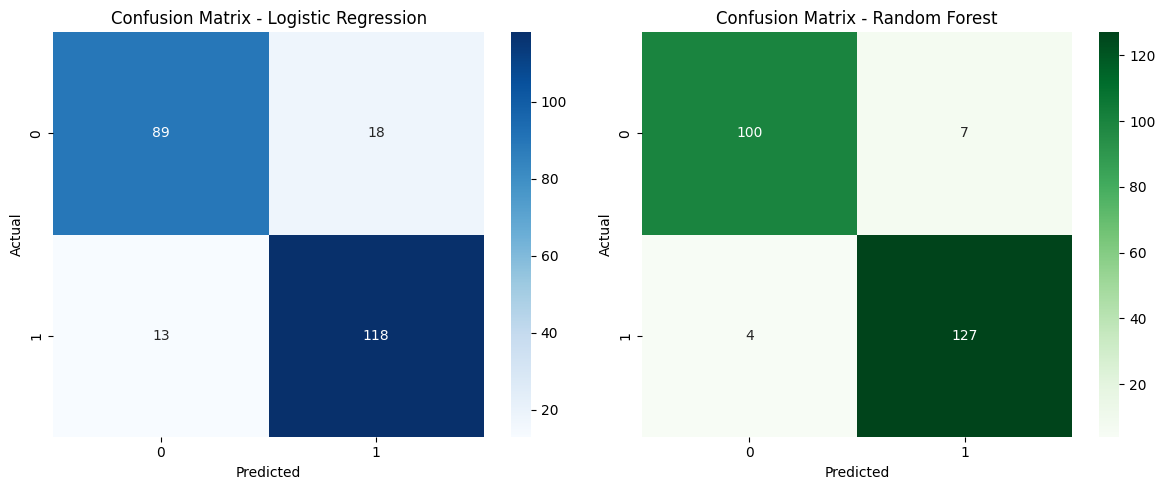

In [31]:
# Generate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## Step 10. Saving the Best Model

In [40]:
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']